<a href="https://colab.research.google.com/github/Saifullah785/statistics-for-data-science-journey/blob/main/Lecture_03_Statistical_Tests/Lecture_03_Statistical_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Statistical Analyses

## 1. Chi-square Test

In [2]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Null Hypothesis:

There is no significant association between gender ('sex') and survival ('survived') on the Titanic. This means any observed differences in survival rates between genders in the dataset are due to chance and not due to an underlying relationship.

Alternative Hypothesis:

There is a significant association between gender ('sex') and survival ('survived') on the Titanic. This implies that the differences in survival rates are not just due to chance but are influenced by the passengers' gender.

In [4]:
contigency_table = pd.crosstab(df['sex'], df['survived'])
contigency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [5]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

print(f'Chi-square Statistic: {chi2}')
print(f'P-value: {p}')
print('Degrees of freedom:', dof)
print(f'Expected Frequencies:\n{expected}')

Chi-square Statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrees of freedom: 1
Expected Frequencies:
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


**2. Normal Distribution Test**

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

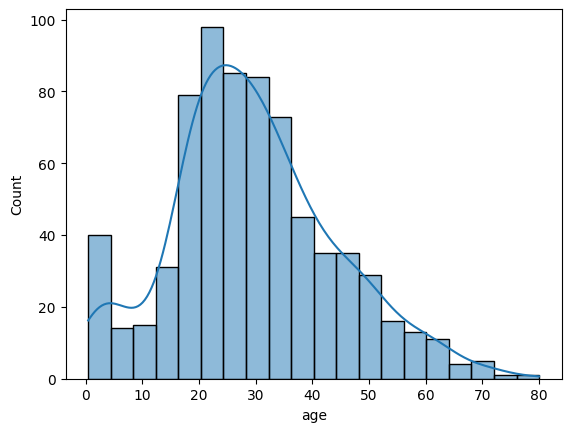

In [7]:
# graphical Method
sns.histplot(data=df, x='age', kde=True)

shapiro wilk Test on Normal Distribution Gaussian Distribution
Null Hypothesis: The data is normally distributed.
Alternative Hypothesis: Data is not normally distributed.

In [8]:
# shapiro Wilk Test
statistic, p = stats.shapiro(df['age'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: nan, Sample does not look Gaussian/Normally Distributed (reject H0)


<Axes: xlabel='fare', ylabel='Count'>

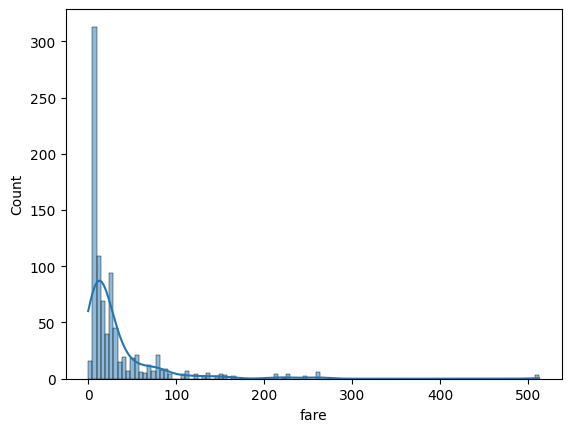

In [9]:
sns.histplot(data=df, x='fare', kde=True)

In [10]:
statistic, p = stats.shapiro(df['fare'])
# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 1.0840444395829658e-43, Sample does not look Gaussian/Normally Distributed (reject H0)
